## The questions about this dataset:
1. Does higher budget mean higher popularity ? Is there a coefficent relationship ?

2. Will the runtime affect the vote count and popularity?

3. Higher popularity means higher profits ?

4. What Features are Associate with Top 10 Revenue Movies ?

5. Which genres are most popular from year to year?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling:
- Be familiar with the data types, data structure. I will delete the duplicates and unuseful columns like imdb_id,homepage etc.
- Here in this problem senario to handle missing data I use two ways: for all the missing data with data type object, I fill the null with string "missing". For budget, datatype integer,I fill 0 with np.NAN.

In [91]:
# Loading the data and printing its head
df=pd.read_csv("tmdb_movies_data.csv")
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


In [3]:
# checking the shape of the dataset
df.shape

(10866, 21)

In [4]:
# Checking the datatypes
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
#checking the unique values of all the column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
# Statistical measures of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
#Checking the nan values of all the columns
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [16]:
# drop the non-useful columns
df.drop(['id','imdb_id', 'homepage','overview'],axis=1,inplace=True) 

# For all missing data with object as datatype , I fill in with string "missing"
df['cast'].fillna('missing',inplace=True )
df['director'].fillna('missing',inplace=True)
df['tagline'].fillna('missing',inplace=True)
df['keywords'].fillna('missing',inplace=True)
df['genres'].fillna('missing',inplace=True)
df['production_companies'].fillna('missing',inplace=True) 
df['budget'] = df['budget'].replace(0, np.NAN) 
# although there is no null in budget, but we would find there is a problem when we calculate df['budget'].median()
# Will deal with all the 0 value in budget later.

In [17]:
df.isnull().sum()

popularity                 0
budget                  5696
revenue                    0
original_title             0
cast                       0
director                   0
tagline                    0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [18]:
# Checking the duplicates if duplicates exists drop it.
df.duplicated().sum()

0

In [19]:
# Droping duplicates
df.drop_duplicates(inplace=True)
# check once again duplicates
df.duplicated().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028B0B713AF0>,
      dtype=object)

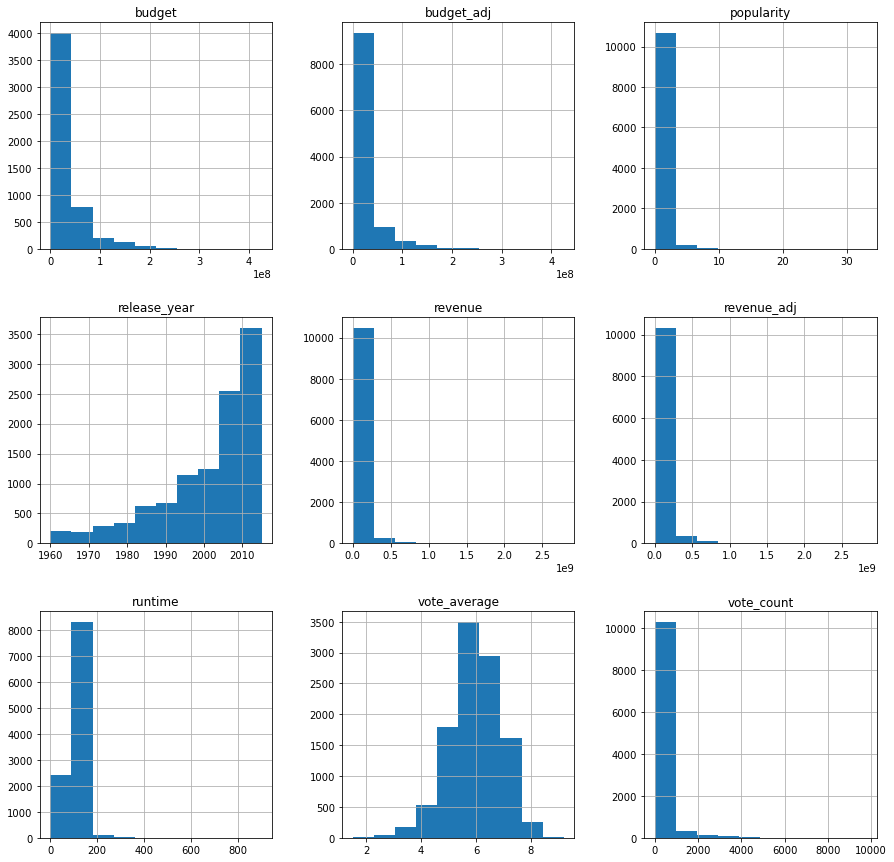

In [20]:
#Visualizing all the data columns
df.hist(figsize=(15,15))

## Exploration with Visuals and Conclusions :
Question 1. Does higher budget mean higher popularity ? Is there a coefficent relationship ?

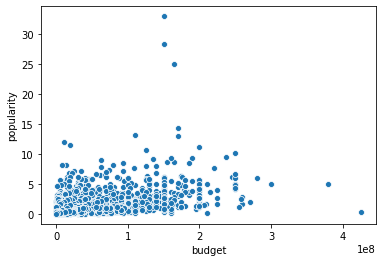

In [21]:
# Plotting the relation between budget and popularity
x = df['budget']
y = df['popularity'] 
sns.scatterplot(x=x,y=y, data=df)

We can not see very strong relatioship between the budget and the popularity from above plot.
Let's try to compare the data in another way: create two groups based on median value of budget



In [27]:
# based on median budget value to divide the budget into two groups : low and high
m=df['budget'].median()
print(m)
low_budget=df.query('budget < {}'.format(m))
high_budget=df.query('budget >= {}'.format(m))


17000000.0


In [24]:
#check low budget and high budget mean values respecively 
mean_popularity_of_low_budget = low_budget['popularity'].mean()
mean_popularity_of_high_budget = high_budget['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

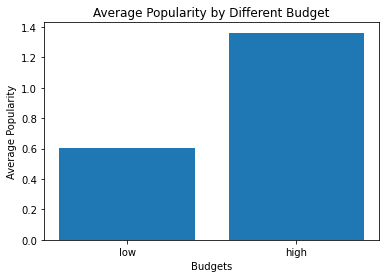

In [46]:
# Make a bar plot with above data
locations = [1,2]
heights = [mean_popularity_of_low_budget , mean_popularity_of_high_budget]
labels=['low','high']
plt.bar(locations,heights,tick_label=labels)
plt.title('Average Popularity by Different Budget')
plt.xlabel('Budgets')
plt.ylabel('Average Popularity')

In [48]:
# locations = ['Low','High']
# heights = [mean_popularity_of_low_budget , mean_popularity_of_high_budget]
# x=locations
# y=heights
# sns.barplot(x=locations,y=heights)

In [49]:
increase_percentage = (mean_popularity_of_high_budget - mean_popularity_of_low_budget) / mean_popularity_of_high_budget * 100
increase_percentage

55.50933772947092

Conlcusion for Q1: Through this bar plot, we can clearly see that, high budget movies are more likely to have higher popularity. We can make this conclusion that higher budget movies gains more than 50% (55.50 %) higher popularity than low budget movies.

Q2: What length will receive the highest popularity?

In [70]:
df['runtime'].head(10)

0    124
1    120
2    119
3    136
4    137
5    156
6    125
7    141
8     91
9     94
Name: runtime, dtype: int64

Text(0, 0.5, 'popularity')

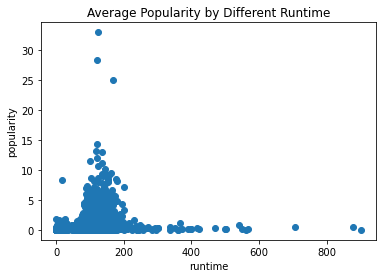

In [59]:
# Plotting the relationship between runtime and popularity
x = df['runtime']
y = df['popularity'] 

plt.scatter(x,y)

plt.title('Average Popularity by Different Runtime',fontsize=12)
plt.xlabel('runtime',fontsize=10)
plt.ylabel('popularity',fontsize=10)


We can not see very strong relatioship between the runtime and the popularity from above plot. Let us compare the data in another way.

In [56]:
# Here I make 3 groups of 'runtime' column using query() function ----  <60 min: short,  >=60 and <=120min : medium, >120 : long
short=df.query('runtime< {}'. format(100))
medium=df.query('runtime< {}'. format(200))
long=df.query('runtime> {}'. format(200))

In [57]:
# Checking popularity's mean for different lenghts
mean_popularity_of_short = short['popularity'].mean()
mean_popularity_of_medium = medium['popularity'].mean()
mean_popularity_of_long = long['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

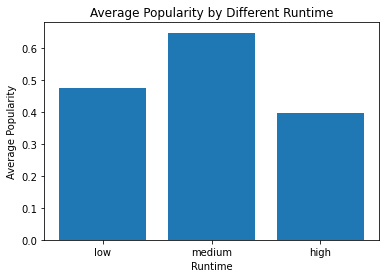

In [58]:
# Plotting bar graph for above values
locations = [1,2,3]
heights = [mean_popularity_of_short, mean_popularity_of_medium, mean_popularity_of_long]
labels=['low','medium','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average Popularity by Different Runtime')
plt.xlabel('Runtime')
plt.ylabel('Average Popularity')

Conclusion Q2:
Combine two plots above, we can not simply say , the longer runtime, the more popular the movies are.
If the movies are within 200 minutes,it will be more popular. Once the movies run over 200 minutes, it's hard for them to gain high popularity

Q3 : Higher popularity means higher profits ?

In [64]:
# Getting mean of the popularity
m_popularity = df['popularity'].median()
low_popularity =  df.query('popularity < {}'.format(m_popularity))
high_popularity =  df.query('popularity >= {}'.format(m_popularity))

In [65]:
# Creating new column named profit -- revenue-budget
df['profit']=df['revenue']-df['budget']
df['profit'].head()

0    1.363529e+09
1    2.284364e+08
2    1.852382e+08
3    1.868178e+09
4    1.316249e+09
Name: profit, dtype: float64

In [66]:
# Average net profit for low _popularity and high_popularity
mean_profit_of_low_popularity = low_popularity['profit'].mean()
mean_profit_of_high_popularity = high_popularity['profit'].mean()


Text(0, 0.5, 'Average Profit')

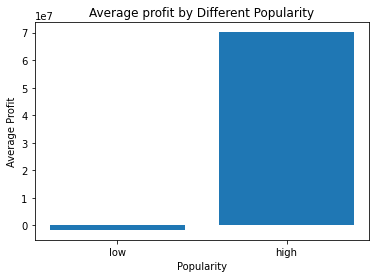

In [67]:
# create a bar chart with the values we get above 
locations = [1,2]
heights = [mean_profit_of_low_popularity, mean_profit_of_high_popularity]
labels=['low','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average profit by Different Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Profit')

Conclusion for Q3: 
From the above graph, we can say that high popularity movies makes more average profits than low popularity movies

Q4 What Features are Associate with Top 10 Revenue Movies ?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028B0BB7F100>,
      dtype=object)

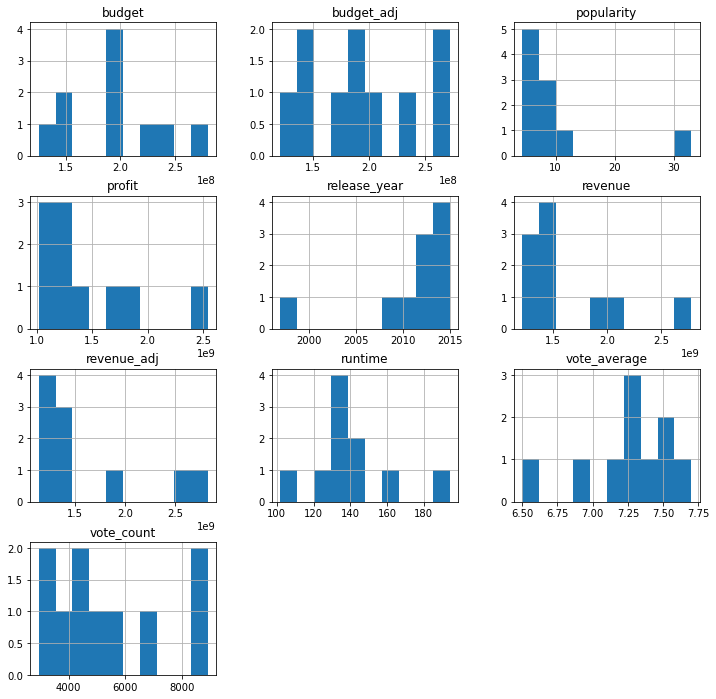

In [69]:
top10_revenue_movies = df.nlargest(10,'revenue')
top10_revenue_movies.hist(figsize=(12,12))

Conclusion Q4: 
From observing some of the characteristic above we can conclude from the top 10 movies. Runtime ranges from 100 mins to 200 mins. The released year are between 1995 to 2015


Q5 Which genres are most popular from year to year?

In [71]:
# This function gives all the counts for each and every category
def extracting_data(column_name):
    data = df[column_name].str.cat(sep = '|') # put all the genres into a long string  
    # Create pandas series and store the values separately
    data = pd.Series(data.split('|'))   # split the genres by |
    # Display value count in descending order
    count = data.value_counts(ascending = False) 
    return count

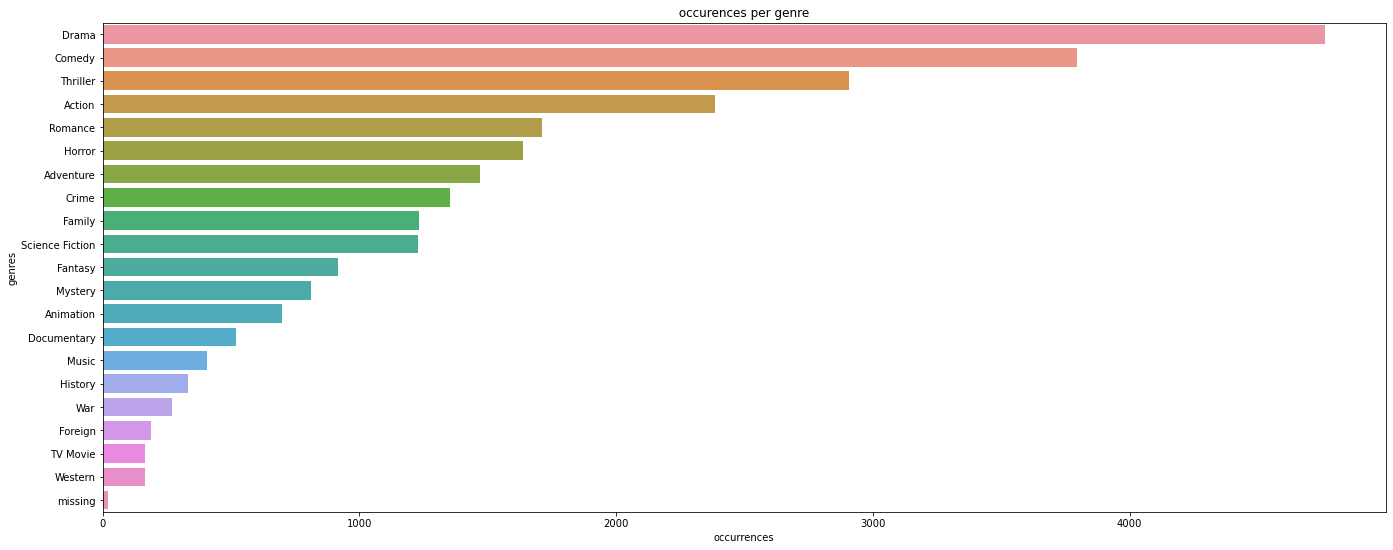

In [73]:
#Use the function created above to split and count each and every occurences
genre_count = extracting_data('genres')

#create a separate dataframe to plot
df_genre_counts = pd.DataFrame({'genres': genre_count.index, 'count': genre_count.values }) 
#df_genre_counts

f, ax = plt.subplots(figsize=(23, 9))
# use the dataframe just created as the input data 
sns.barplot(x = 'count', y = 'genres', data=df_genre_counts) # how to get the data is the key 
ax.set_title(' occurences per genre ')
ax.set_xlabel('occurrences')
ax.set_ylabel('genres')
plt.show()

In [75]:
count_director = extracting_data('director')
count_director

Woody Allen          46
missing              44
Clint Eastwood       34
Martin Scorsese      31
Steven Spielberg     30
                     ..
Josh Lowell           1
Michael Axelgaard     1
Adolfo Alix Jr.       1
Roxanne Benjamin      1
Antony Hoffman        1
Length: 5363, dtype: int64

Text(0, 0.5, 'number of movies')

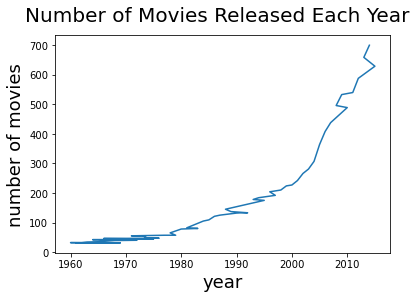

In [76]:
movie_count = df['release_year'].value_counts()
fig = plt.figure()
plt.plot(movie_count)
fig.suptitle('Number of Movies Released Each Year',fontsize=20)
plt.xlabel('year',fontsize=18)
plt.ylabel('number of movies',fontsize=18)

From the above two plots, we can see The top 5 genres are Drama, Comedy, Action, Horror and Adventrue and the number of movies increased along the time.

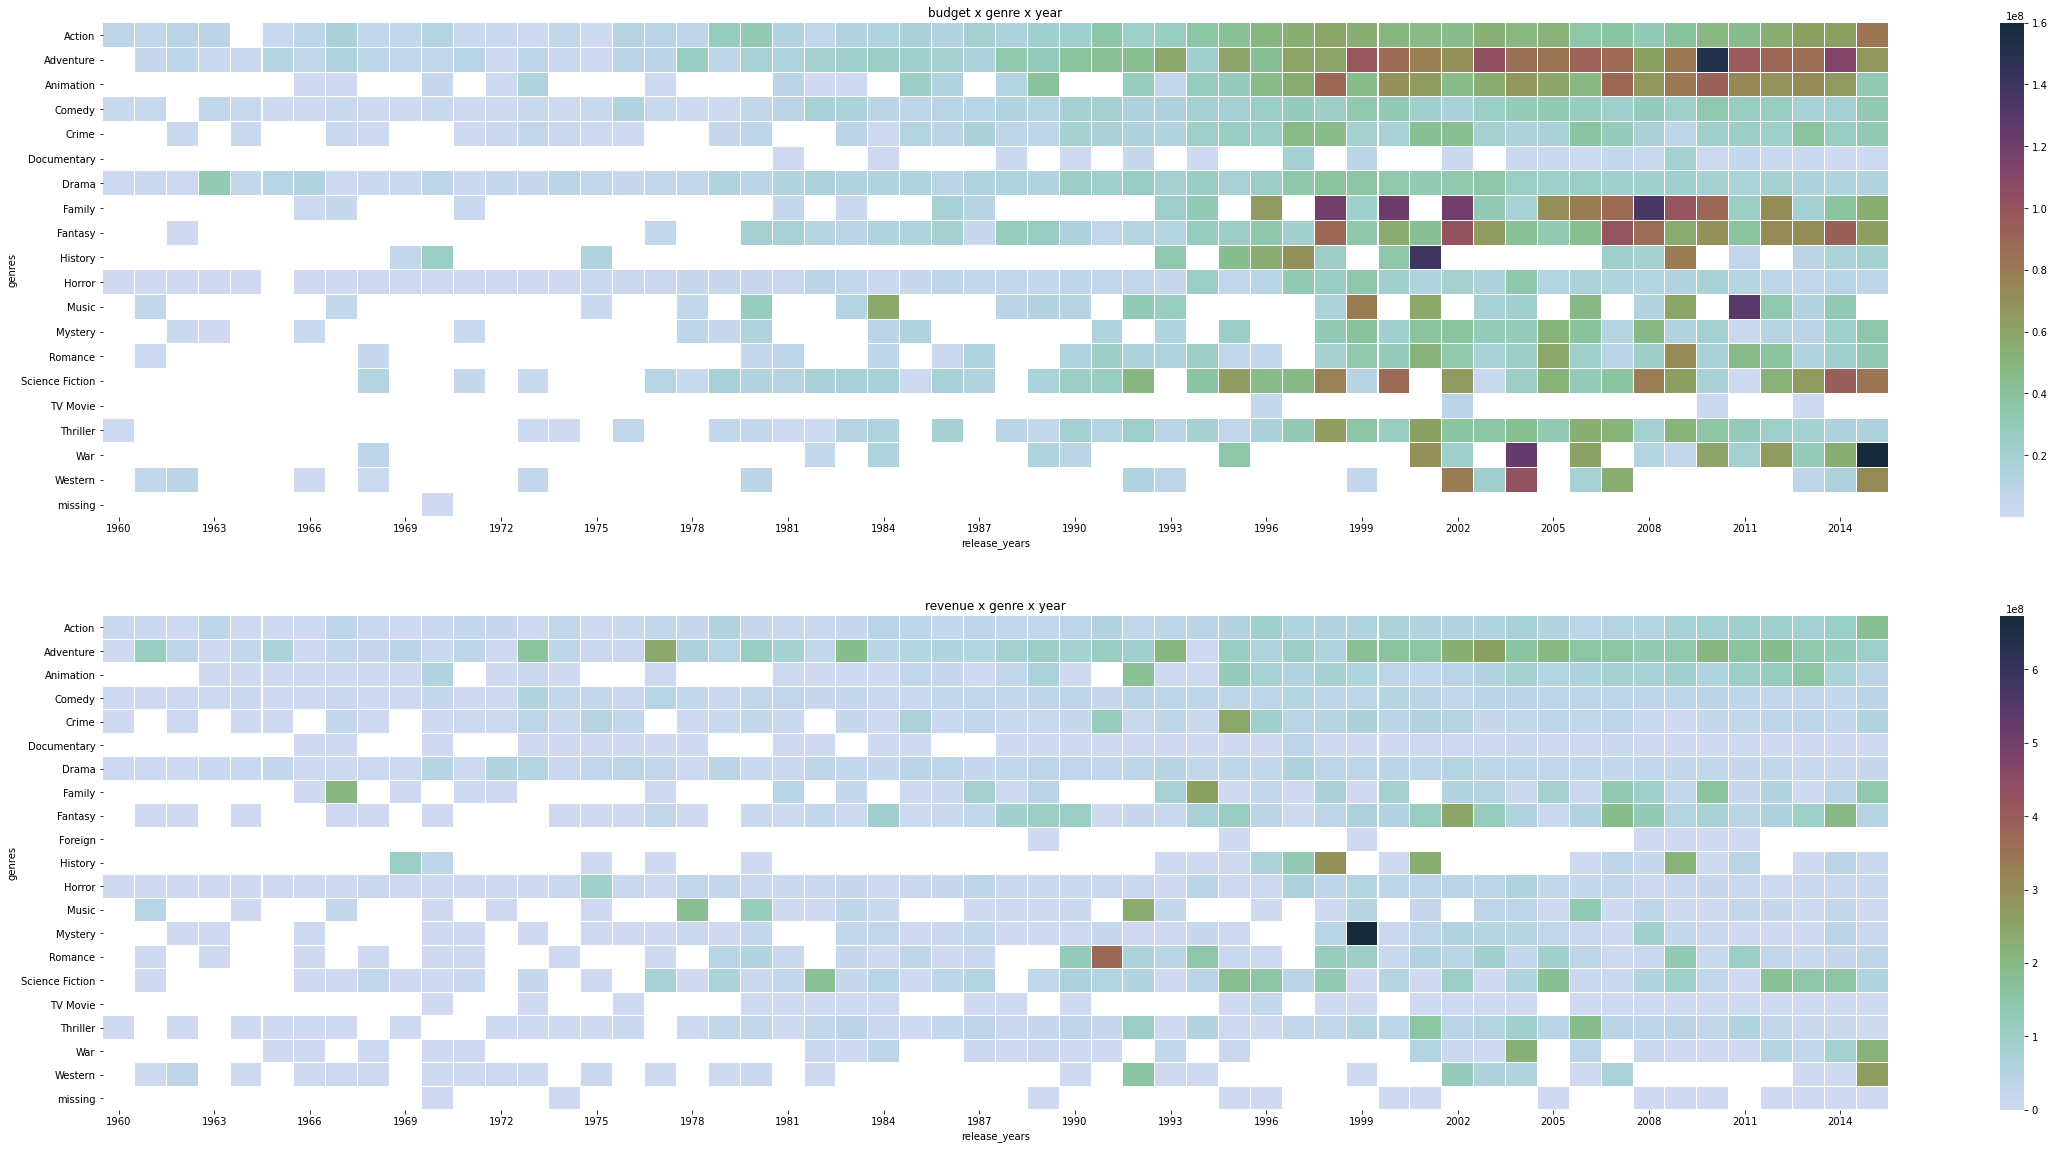

In [90]:
# The following heatmap shows the revenue and budget for each genre type per year
# genres are so specific, I will just take the first genre for each movie instead of the genre combination
df['genre'] =  df['genres'].apply(lambda x: x.split('|')[0])

# ploting all the genre types for each year with the budget and revenue
genre_year = df.groupby(['genre', 'release_year']).mean().sort_index()
df_gyBudget = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='budget', aggfunc=np.mean)
df_gyBudget = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='budget', aggfunc=np.mean)


df_gyGross = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='revenue', aggfunc=np.mean)
f, [axA, axB] = plt.subplots(figsize=(40, 20), nrows=2)
cmap = sns.cubehelix_palette(start=2.0, rot=1.5, as_cmap=True)
sns.heatmap(df_gyBudget, xticklabels=3, cmap=cmap, linewidths=0.05, ax=axA)
sns.heatmap(df_gyGross, xticklabels=3, cmap=cmap, linewidths=0.05, ax=axB)
axA.set_title('budget x genre x year')
axA.set_xlabel('release_years')
axA.set_ylabel('genres')


axB.set_title('revenue x genre x year')
axB.set_xlabel('release_years')
axB.set_ylabel('genres')
plt.show()

Conclusion Q5:
As the time passes, we have a wide range of movies and genres to choose from 1984 to 2014.
There are more high budget movies when compared to high revenue movies.
    

## Conclusions:
##### Based on my above analysis, we can make some conclusions:
1. The quantity and range of movie gets larger. We have more choices to choose from as an audience.(audience point of view)
2. We can'nt say high budget guarantees high popularity. But for movies with higher budgets do produce higher average popularity.
3. To produce a more popular movie, the runtime should be best around 120-150 mins
4. Drama, Comedy, Action, these genres would be preferable.

## Limitations:

There are many factors that makes movies popular and successful as mentioned above. But we should notice the limitations, that we have many missing values with zeros
which may affect the analysis.
- It's hard for us to know how the vote_counts and the popularity of the movies are measured.

- For foreign movies,currency is not indicated. The main factor,i.e, the inflation over the years should also be taken into consideration.

## References:

1. https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html
2. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html
3. https://pandas.pydata.org/pandas-docs/stable/visualization.html
4. https://www.kaggle.com (Dataset taken from kaggle compitetion)